In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [33]:
from sqlite3 import connect

conn = connect('db.sqlite3')

df = pd.read_sql_query('''
    SELECT * FROM restaurant_orderitem
    INNER JOIN restaurant_product ON restaurant_orderitem.product_id = restaurant_product.id
    INNER JOIN restaurant_order ON restaurant_orderitem.order_id = restaurant_order.id
''', conn)

In [34]:
df.drop(columns=['id', 'id', 'id'], inplace=True)

In [35]:
df.index += 1
df

,quantity,order_id,product_id,price,name,datetime
1,2,1,6,0.80,Plain Papadum,2019-08-03 20:25:00
2,1,1,240,12.95,King Prawn Balti,2019-08-03 20:25:00
3,1,1,19,2.95,Garlic Naan,2019-08-03 20:25:00
4,1,1,36,3.95,Mushroom Rice,2019-08-03 20:25:00
5,1,1,111,8.95,Paneer Tikka Masala,2019-08-03 20:25:00
...,...,...,...,...,...,...
74814,2,3255,247,17.95,House Red wine 75cl,2016-05-18 18:53:00
74815,2,12905,247,17.95,House Red wine 75cl,2016-05-14 19:28:00
74816,2,3272,247,17.95,House Red wine 75cl,2016-05-10 13:18:00
74817,1,11404,248,17.95,House white wine 75cl,2016-04-07 19:04:00


# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

<Axes: ylabel='quantity'>

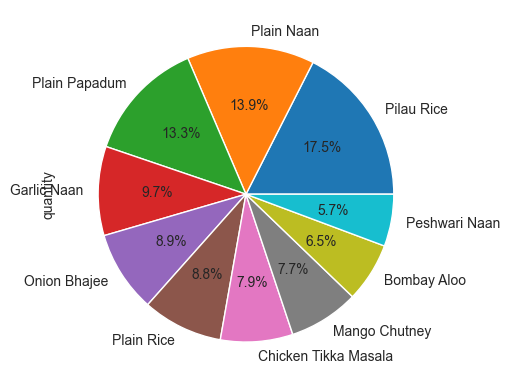

In [36]:
df.groupby(df['name']).count()['quantity'].sort_values(ascending=False).head(10).plot.pie(autopct='%1.1f%%')

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

In [37]:
df_item = df.groupby(df['name']).sum()[['quantity', 'price']]

In [38]:
df_item['item_price'] = df_item['quantity'] * df_item['price']
df_item

,quantity,price,item_price
name,,,
Aloo Chaat,316,1410.75,445797.00
Aloo Gobi,620,3659.25,2268735.00
Aloo Methi,44,261.80,11519.20
Baingan Hari Mirch,199,1172.15,233257.85
Bengal Fish Biryani,45,492.10,22144.50
...,...,...,...
Vindaloo - Chicken Tikka,17,135.15,2297.55
Vindaloo - King Prawn,23,274.85,6321.55
Vindaloo - Lamb,55,429.30,23611.50


<Axes: ylabel='item_price'>

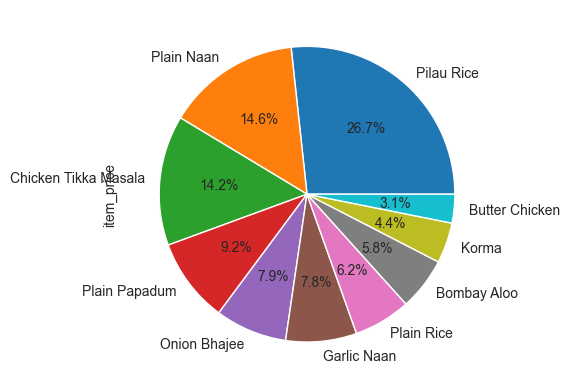

In [39]:
df_item.sort_values(by='item_price', ascending=False).head(10).plot.pie(y='item_price', autopct='%1.1f%%', legend=False)

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

In [40]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['hour_bin'] = df['datetime'].dt.hour

In [45]:
df['item_price'] = df['quantity'] * df['price']

<Axes: xlabel='hour_bin'>

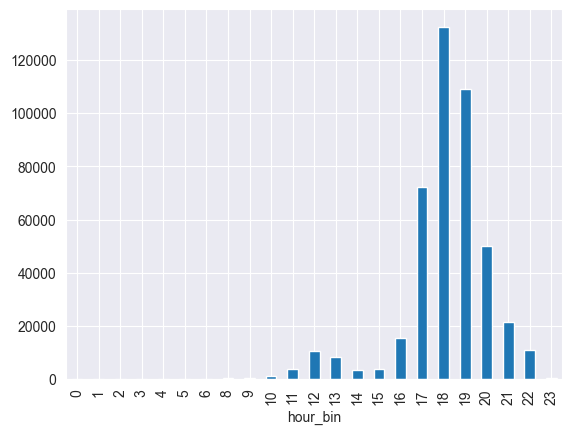

In [48]:
df.groupby(df['hour_bin'])['item_price'].sum().plot.bar()

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

<Axes: xlabel='day_of_week'>

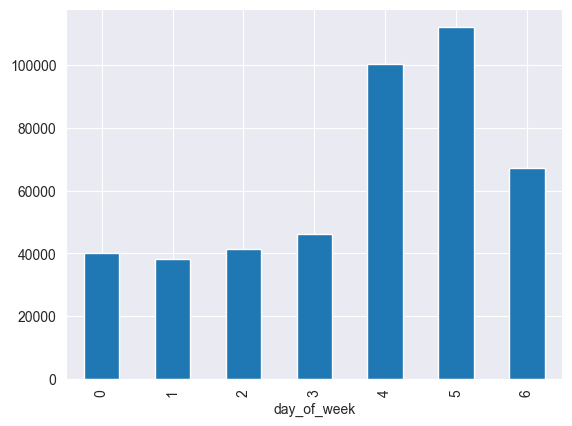

In [49]:
df['day_of_week'] = df['datetime'].dt.dayofweek
df.groupby(df['day_of_week'])['item_price'].sum().plot.bar()